In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy
import pylab as pl
import scipy.stats
from scipy import stats
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import statsmodels.formula.api as smf
%matplotlib inline
from random import shuffle

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('finaldata_sb.csv', index_col=0 )
data.shape

(180, 15)

In [3]:
	ZIP
Y	yearlyChange_SmallBuss10_13
Y1	NumberSB(total)2013(normbypop)
X1	Change_Rent_2009_2015
X2	Animal Abuse
X3	Blocked Driveway/Traffic/Illegal Parking
X4	Derelict Vehicle
X5	Disorderly Youth/Graffiti/BikeRoller_SkateChronic
X6	Drinking
X7	Illegal Fireworks
X8	Noise
X9	Panhandling/Homeless Encampment
X10	Vending
X11	Totalsum
	Population 2015
	percentage of pop per ZiP

SyntaxError: invalid syntax (<ipython-input-3-4031c2633e9a>, line 2)

In [4]:
data.head()
data = data.sort()

In [5]:
data.head()

,Y,Y1,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Population2015,percentage_pop_perZiP
10001,0.00,18.39,0.03,0.102191,1.032670,0.008068,0.040339,0.010757,0.000000,1.148308,0.115638,0.112948,2.570919,22717,0.00
10002,0.02,30.13,-0.01,0.473257,5.730525,0.185188,0.216052,0.226340,0.072017,18.827398,0.267493,0.493833,26.492104,86908,0.01
10003,0.01,25.45,0.02,0.379340,2.680671,0.088513,0.107480,0.101157,0.000000,9.938714,1.346658,0.303472,14.946005,53407,0.01
10004,0.02,0.30,0.02,0.000452,0.028219,0.000226,0.000000,0.000000,0.000000,0.027767,0.001580,0.003161,0.061404,1907,0.00
10005,0.00,1.16,0.02,0.003032,0.073783,0.002021,0.005054,0.000000,0.000000,0.200125,0.015161,0.018193,0.317370,8538,0.00


In [8]:
#n = n-1
#train1 = data[:][0:((N/2)-1)]
#valid1 = data[:][(N/2):(N-1)]
train1 = data[:][::2]
valid1 = data[:][1::2]
valid1.head()

,Y,Y1,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Population2015,percentage_pop_perZiP
10002,0.02,30.13,-0.01,0.473257,5.730525,0.185188,0.216052,0.226340,0.072017,18.827398,0.267493,0.493833,26.492104,86908,0.01
10004,0.02,0.30,0.02,0.000452,0.028219,0.000226,0.000000,0.000000,0.000000,0.027767,0.001580,0.003161,0.061404,1907,0.00
10006,0.01,0.37,0.02,0.001446,0.019759,0.000964,0.000000,0.000000,0.000000,0.028434,0.000964,0.004337,0.055903,4071,0.00
10009,0.04,9.29,0.02,0.608500,2.403190,0.215671,0.084728,0.123241,0.000000,13.502540,0.593095,0.331209,17.862174,65066,0.01
10011,0.01,21.00,0.02,0.183139,2.535331,0.051508,0.068677,0.057231,0.017169,6.415591,0.847018,0.635264,10.810928,48345,0.01


In [9]:
train1.head()

,Y,Y1,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Population2015,percentage_pop_perZiP
10001,0.00,18.39,0.03,0.102191,1.032670,0.008068,0.040339,0.010757,0,1.148308,0.115638,0.112948,2.570919,22717,0.00
10003,0.01,25.45,0.02,0.379340,2.680671,0.088513,0.107480,0.101157,0,9.938714,1.346658,0.303472,14.946005,53407,0.01
10005,0.00,1.16,0.02,0.003032,0.073783,0.002021,0.005054,0.000000,0,0.200125,0.015161,0.018193,0.317370,8538,0.00
10007,0.03,1.08,0.01,0.003225,0.083035,0.001612,0.003225,0.001612,0,0.125763,0.009674,0.037890,0.266036,6810,0.00
10010,0.01,11.53,0.03,0.072947,0.826737,0.032421,0.056737,0.016211,0,1.426526,0.222895,0.109421,2.763895,34234,0.00


In [10]:
#Using Funcion "regress"
def regress(mask):
    formstr='Y~-1'
    for i in range(0,len(mask)):
        if mask[i] == 1:
            formstr = formstr + '+X' + str(i + 1)
    lm = smf.ols(formula=formstr, data = train1).fit()
    lmy2 = lm.predict(valid1)
    R2=1 - sum(pow(lmy2 - valid1.Y, 2)) / sum(pow(valid1.Y - mean(valid1.Y), 2))
    p1 = sum(mask)
    n1 = len(valid1)
    firstpart = (1-R2)
    secondpart = (n1-p1-1.0)
    #print p1/ secondpart
    takeout = firstpart * (p1 / secondpart)
    AR2 = R2 - firstpart * takeout
    #print "R2 = %s, Adjusted R2 = %s, n = %s, p = %s, tout = %s, fp = %s, sp = %s" % (R2, AR2, n1, p1,takeout,firstpart,secondpart)
    return (R2,formstr)



In [11]:

#instead of forward make it backward
n = 11
mask0 = [1] * n #initially all of the regressors are included (creates a one array)
r20 = regress(mask0)[0] #initially regression with all
print "The initial regression is %s" % (r20)
while True:
    bestI = -1 #best regressor to exclude
    for i in range(0,n):
        if (mask0[i] == 1):
            mask = mask0[:]
            mask[i] = 0
            r2 = regress(mask)[0]
            if (r2 > r20):
                r20 = r2
                bestI = i
    if (bestI >= 0):
        mask0[bestI] = 0
        print 'Taking out X%s, the regression is better %s' % (bestI+1,r20)
        if sum(mask0) == 1:
            break
    else:
        break
(r2,str1)= regress(mask0)
lm = smf.ols(formula = str1, data = valid1).fit()
lmy = lm.predict()
print r2
lm.summary()

The initial regression is -1.51178718468
Taking out X1, the regression is better -0.589794452369
Taking out X5, the regression is better -0.588530157786
Taking out X7, the regression is better -0.207452688659
Taking out X10, the regression is better -0.193189146544
Taking out X6, the regression is better -0.186894730929
-0.186894730929


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     13.23
Date:                Sun, 13 Mar 2016   Prob (F-statistic):           1.72e-10
Time:                        01:09:46   Log-Likelihood:                 218.89
No. Observations:                  90   AIC:                            -425.8
Df Residuals:                      84   BIC:                            -410.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X2             0.0313      0.015      2.143      0.035         0.002     0.060
X3             0.0030      0.010      0.294      0.770        -0.017     0.023
X4             0.0053      0.010      0.514      0.608        -0.015     0.026
X8             0.0031      0.010      0.302      0.764        -0.017     0.023
X9             0.0237      0.022      1.054      0.295        -0.021     0.068
X11           -0.0029      0.010     -0.298      0.767        -0.023     0.017
==============================================================================
Omnibus:                       12.544   Durbin-Watson:                   1.566
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               21.247
Skew:                          -0.534   Prob(JB):                     2.43e-05
Kurtosis:                       5.127   Cond. No.                         252.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
len(data.Y)

180

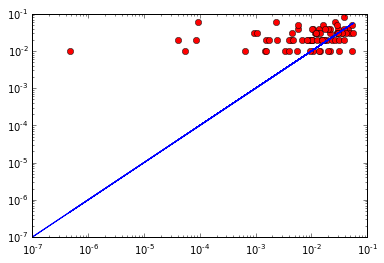

In [13]:
#X = data['X5']
#Y = data['Y']
plt.plot(lmy,valid1.Y,'or')
plt.plot(lmy,lmy,'-b')
plt.xscale('log')
plt.yscale('log')
#lm = smf.ols(formula = str1, data = valid1).fit()